<a href="https://colab.research.google.com/github/vivirocha/Bootcamp_MachineLearning/blob/main/Desafio_ModelosPreditivosSeriesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bootcamp - Eng. Machine Learning - IGTI**

Desafio - Módulo 2

*Modelos Preditivos e Séries Temporais*


**Enunciado** <br>
Neste desafio, serão abordados conceitos apresentados durante a disciplina Modelos Preditivos e Séries Temporais (MPT). Será utilizado o dataset “Banknote authentication”, disponível no UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/banknote+authentication). <br>
Este dataset consiste em atributos contínuos (variance, skewness, curtosis e entropy) extraídos de imagens de cédulas reais e falsificadas através de uma etapa de processamento de sinais (transformação de Wavelet), além da indicação se o exemplo é de uma cédula genuína (class = 0) ou falsificada (class = 1).

In [ ]:
#Importando bibliotecas
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [ ]:
#Carregando e lendo o banco de dados de estudo
banknote=pd.read_csv("data_banknote_authentication.txt", 
                     sep=',',
                     header=None,
                     names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
banknote.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Qual o tamanho desse dataset (número de linhas, número de colunas)? 


In [ ]:
banknote.shape

(1372, 5)

Qual variável possui o maior range (diferença entre valor máximo e mínimo)? <br>
Para resolver esta questão, utilizei os comandos max, min e fiz subtração dos resultados. 

In [ ]:
variance_max = banknote['variance'].max()
variance_min = banknote['variance'].min()
variance_dif = variance_max - variance_min
variance_dif

13.8669

In [ ]:
skewness_max = banknote['skewness'].max()
skewness_min = banknote['skewness'].min()
skewness_dif = skewness_max - skewness_min
skewness_dif

26.7247

In [ ]:
curtosis_max = banknote['curtosis'].max()
curtosis_min = banknote['curtosis'].min()
curtosis_dif = curtosis_max - curtosis_min
curtosis_dif

23.2135

In [ ]:
entropy_max = banknote['entropy'].max()
entropy_min = banknote['entropy'].min()
entropy_dif = entropy_max - entropy_min
entropy_dif

10.9977

Qual a média da coluna skewness? 

Para respondermos esta questão, criaremos uma variável (opcional), usaremos o comando **.mean()** para obtermos a média e a função **round** para arredondarmos o resultado.


In [ ]:
skewness = banknote['skewness'].mean()
round(skewness, 5)

1.92235

Qual a média da coluna entropy? 

In [ ]:
entropy = banknote['entropy'].mean()
round(entropy, 5)

-1.19166

Qual a mediana da coluna variance? 
Diferentemente da questão anterior, para obtermos a mediana, usaremos o comando **.median()**.

In [ ]:
variance = banknote['variance'].median()
round(variance, 5)

0.49618

Qual o desvio padrão da coluna curtosis? 


In [ ]:
curtosis = banknote['curtosis'].std()
round(curtosis, 5)

4.31003

Qual a porcentagem de exemplos do dataset que são cédulas falsas (class=1)? 

Somaremos o resultado da coluna class que sejam iguais a 1, faremos a divisão do resultado pelo total da amostra e arredondaremos.

In [ ]:
class1=banknote['class']==1
class1.sum()

610

In [ ]:
porcentagem1 = (610/1372)*100
round(porcentagem1, 2)

44.46

Iremos separar o dataset entre 30% para teste e 70% para treinamento utilizando **sklearn**.
Usaremos as colunas **variance**, **skewness**, **curtosis** e **entropy** como entrada e a coluna **class** como saída.

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = banknote.iloc[:,0:4] 
y = banknote['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [ ]:
#Processo de normalização dos dados.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Qual o valor da correlação de Pearson entre as variáveis skewness e curtosis? 


In [ ]:
import seaborn as sns
banknote.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


Acima usamos **seaborn**, mas também pode ser resolvido da forma abaixo.

In [ ]:
correlation = banknote.corr()
print(correlation.loc['skewness','curtosis'])
round(correlation, 6)

-0.7868952243065797


,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


Qual a acurácia do KNN no conjunto de teste?  <br>
*Utilize a variável “class” como saída e as demais como entrada dos modelos.*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf_KNN = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
clf_KNN.fit(X_train, y_train)                 #aplica a classificação
y_pred = clf_KNN.predict(X_test)              #faz a previsão
acuracia(y_test, y_pred)                   #mostra a acurácia

In [ ]:
print(acuracia)

(1240    1
703     0
821     1
1081    1
37      0
       ..
559     0
400     0
439     0
634     0
628     0
Name: class, Length: 412, dtype: int64, array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test.values,y_pred))
print(classification_report(y_test.values,y_pred))

[[234   1]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       0.99      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



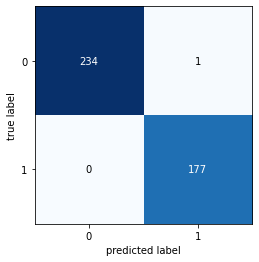

In [ ]:
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
#Criando o objeto de classificação
clf = DecisionTreeClassifier()

#Realizando o treinamento do classificador
clf = clf.fit(X_train, y_train)

#Realizando a previsão de classificação
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test.values,y_pred))
print(classification_report(y_test.values,y_pred))

[[231   4]
 [  1 176]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       235
           1       0.98      0.99      0.99       177

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



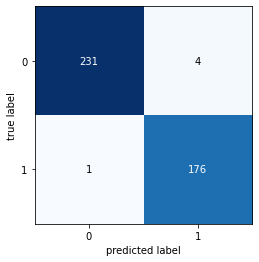

In [ ]:
#Avaliando o modelo
#plotando da matriz de confusão
arvmatriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=arvmatriz_confusao)
plt.show()

In [ ]:
#Importando as bibliotecas necessárias para a construção do algoritimo SVM
from sklearn.svm import SVC

In [ ]:
clf = SVC()

In [ ]:
#Realizando a classificação via SVM
clf.fit(X_train, y_train)

SVC()

In [ ]:
#Realizando a previsão de classificação
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test.values,y_pred))
print(classification_report(y_test.values,y_pred))

[[235   0]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



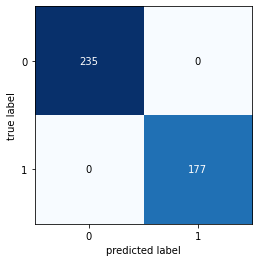

In [ ]:
#Avaliando o modelo
svmmatriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=svmmatriz_confusao)
plt.show()